In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ejercicio 1

*A)* Descargamos los datos usando pandas

In [ ]:
vinos = pd.read_csv("wine.csv")

In [ ]:
conjunto = vinos.to_numpy()

*B)* Separamos los datos en las variables independientes(datos) y dependientes.

In [ ]:
datos = conjunto[:, :-1] #independientes
dependientes = conjunto[:, -1]

*C)* Normalizamos y centramos los datos

In [ ]:
def normalizar (matriz):
    nlin , ncol = matriz.shape
    X = np.mean(matriz, axis =0)
    S = np.std(matriz , axis =0)
    matriznormalizada = np.zeros((nlin,ncol))
    for i in range(ncol):
       for j in range(nlin):
         matriznormalizada[j][i] = (matriz[j][i] -  X[i]) / S[i]
    return (matriznormalizada, S , X )# matriz normalizada , la media y desvio estandar

**Porque es importante este paso?**

La normalización y centrado de datos es un paso importante en el procesamiento de datos. Al restarle el valor promedio de datos a cada punto, estamos "centrando" los datos en cero. Esto es útil porque ayuda a que los datos tengan un promedio cercano a cero, lo que facilita su análisis.

Además de centrar los datos, la normalización también los "escala". Es decir dividimos cada valor por s para que todas las variables tengan la misma escala. Cuando diferentes variables están en diferentes escalas, puede ser difícil compararlas o utilizarlas juntas en algoritmos.

En resumen, la normalización y el centrado de datos ayudan a facilitar el análisis y el uso de datos, asegurando que tengan una escala y una ubicación adecuadas para su procesamiento.

*D)* Matriz de covarianza

In [ ]:
def covarianza(matriz):
  nlin, ncol = matriz.shape
  normalizado = normalizar(matriz)[0]
  return (normalizado.T @ normalizado)/nlin

**¿Que representa la matriz de covarianza? ¿Que dimensiones tiene y que propiedades cumple?**

La matriz de covarianza es una herramienta utilizada en estadísticas y análisis de datos que describe la relación entre variables. Representa cómo dos o más variables aleatorias se relacionan entre sí.

La matriz de covarianza es una matriz cuadrada y simetrica. El número de filas y columnas es igual al número de caracteristicas.

La diagonal principal de la matriz de covarianza contiene las varianzas de las categorias. Las entradas fuera de la diagonal principal contienen las covarianzas entre pares de variables.

Un valor positivo en la matriz de covarianza indica que las variables tienden a aumentar juntas, mientras que un valor negativo indica que tienden a cambiar en direcciones opuestas.

*E)* Buscamos el maximo autovalor y el autovector correspondiente mediante el metodo de la potencia

El método de la potencia se utiliza para buscar el autovector dominante (el vector propio asociado con el mayor autovalor) de una matriz cuadrada.

Comienza con un vector inicial cualquiera y lo multiplica por la matriz. Luego normaliza el resultado en cada iteración. Con las repeticiones, este proceso converge hacia el autovector y su autovalor correspondiente.

In [ ]:
def maxavalavec(matriz, k):
  v = np.random.rand(matriz.shape[0]) #vector random
  for i in range(k):
    v = (matriz @ v)
    v /= np.linalg.norm(v)
  aval = np.dot(v, np.dot(matriz, v)) / np.dot(v, v)
  vec = v
  return aval, vec

**Ejemplo**

In [ ]:
print(maxavalavec(covarianza(datos),200))

(4.705850252990423, array([ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
        0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
        0.29671456,  0.37616741,  0.28675223]))


*F)* Metodo de deflacion para encontrar los siguientes n autovectores y autovalores

La idea es que desde 0 hasta n genere los autovectores y autovalores llamando a la funcion anterior ("maxavalavec") pero con una nueva matriz. Para asi guardarlos en variables por separado.

Como la funcion anterior siempre devuelve el maximo autovalor con su respectivo autovector, tuvimos que utilizar el metodo de deflacion. Este consiste en ajustar la matriz original a partir de A=A−λv(v.T). Esta modificación hace que el siguiente autovector de la matriz ajustada sea más fácil de encontrar, ya que la contribución del primer autovector ha sido "eliminada".

Como queriamos los autovectores normalizados, generamos una funcion para realizarlo ("norm").

In [ ]:
def norm(matriz):
  nlin , ncol = matriz.shape
  res = np.zeros((nlin,ncol))
  for j in range(ncol):
    for i in range(nlin):
       res[i][j] = (matriz[i][j]) / np.linalg.norm(matriz[:,j])
  return res

def sigavalavec(A,n,k):
  nlin, ncol = A.shape
  autoavalmax = maxavalavec(A, k)[0]
  autovecmax = maxavalavec(A, k)[1]
  autovec = [list(autovecmax)]
  autoval = [autoavalmax]
  matriz = A
  for j in range(n):
    matriz = matriz - (autoavalmax * (np.outer(autovecmax, autovecmax.T)))
    autoavalmax = maxavalavec(matriz, k)[0]
    autovecmax = maxavalavec(matriz, k)[1]
    autovec.append(list(autovecmax))
    autoval.append(autoavalmax)
  autovec = np.array(autovec).T #La trasponemos para tener los autovectores como columnas
  autovec = norm(autovec)
  return (autovec, autoval)

Ejemplo

In [ ]:
print(sigavalavec(covarianza(datos),2,1000))

(array([[ 0.1443294 ,  0.48365155, -0.20738262],
       [-0.24518758,  0.22493093,  0.08901289],
       [-0.00205106,  0.31606881,  0.6262239 ],
       [-0.23932041, -0.0105905 ,  0.61208035],
       [ 0.14199204,  0.299634  ,  0.13075693],
       [ 0.39466085,  0.06503951,  0.14617896],
       [ 0.4229343 , -0.00335981,  0.1506819 ],
       [-0.2985331 ,  0.02877949,  0.17036816],
       [ 0.31342949,  0.03930172,  0.14945431],
       [-0.0886167 ,  0.52999567, -0.13730621],
       [ 0.29671456, -0.27923515,  0.08522192],
       [ 0.37616741, -0.16449619,  0.16600459],
       [ 0.28675223,  0.36490283, -0.12674592]]), [4.705850252990423, 2.4969737334111626, 1.4460719697124975])


**¿Como se relaciona la cantidad de autovalores con la cantidad de propiedades de los vinos?**


**¿Que representan cada unos de los autovectores correspondientes?**



Cuando calculamos los autovalores y autovectores de la matriz de covarianza, estamos identificando las direcciones principales de variación en datos. Los autovalores nos indican la cantidad de información explicada por cada autovector, y los autovectores representan esas direcciones.



Dado que estamos buscando los autovalores dominanates con sus autovectores correspondientes , es decir , que al estar ordenados decrecientemente nos interesa mas las direcciones principales.

En resumen, los autovalores y autovectores obtenidos a partir de la matriz de covarianza nos permiten identificar las principales tendencias y relaciones entre las categorías de propiedades de los vinos, lo que puede ser útil para comprender la estructura  de los datos.








*G)*  Categorizar vinos

Aclaracion: Los parametros de entrada a la funcion "categorizar" son:

*   **avecs** (matriz de autovectores de la covarianza de la base de datos): ingresa a la funcion ya normalizado, es decir llamamos a la funcion "sigavalavec" que te los calucula y normaliza.
*   **bdatos**: ingresa a la funcion normalizada y centrada. Esto lo realizamos en la funcion "normalizar".
*   **s y m**: ingresan siendo la media y desvio estandar de la base de datos. Estos son calculados en la misma funcion "normalizar".
*   **labels**: ingresan siendo las variables dependientes de la bdatos. La clasificacion correspondiente a cada uno de los vinos de bdatos.
*   **cantv**: cantidad de autovectores que usamos en las operaciones dentro de la funcion.
*   **cantknn**: cantidad de labels mas ceracanos que buscará dentro de la funcion.
*   **vinos**: ingresan sin ser modificados ya que dentro de la funcion son normalizados y centrados. Esto se realiza con el s y el m entrado.

In [ ]:
def cantidadApariciones(lista, elemento):
  cont = 0
  for i in range(len(lista)):
    if (lista[i] == elemento):
      cont += 1
  return cont

def categorizar(vinos, avecs, bdatos, s, m, labels, cantv, cantknn):
 nlin, ncol = bdatos.shape
 coordenadas = bdatos @ avecs[:,:cantv]
 distancias = []
 label = []
 proyeccion = []
 proyecciones = ((vinos - m) / s) @ avecs[:,:cantv]
 for j in range(len(vinos)):
     distancias.append(np.linalg.norm(coordenadas - proyecciones[j],axis=1))
 for k in range(len(vinos)):
   distancias[k] = np.argsort(distancias[k])
   lab = []
   i = 0
   while(i < cantknn):
       lab.append(labels[distancias[k][i]])
       i = i + 1
   cantidad1 = cantidadApariciones(lab,1)
   cantidad2 = cantidadApariciones(lab,2)
   cantidad3 = cantidadApariciones(lab,3)
   c = [0,cantidad1, cantidad2, cantidad3]
   label.append(np.argmax(c))
 return label, coordenadas, proyecciones


Ejemplo, entramos un vino fuera de la base de datos

In [ ]:
autovecsnormalizados = ((sigavalavec(covarianza(datos),13,200))[0])
datosnormalizadosycentrados = normalizar(datos[:-1,:])[0]
desvioestandar = normalizar(datos[:-1,:])[1]
media = normalizar(datos[:-1,:])[2]
labels = dependientes[:-1]
vino = datos[-1]

print(categorizar([vino],autovecsnormalizados,datosnormalizadosycentrados,desvioestandar, media, labels,1,1)[0])

[3]


En primer lugar, calculamos las coordenadas de todos los vinos en la base de datos(coordenadas). Estas coordenadas van a depender de el cantv, es decir  si pedimos n cantv vamos a tener cordenadas de n dimensiones.

Luego, calculamos las coordenadas de los vinos a categorizar. Siendo previamenete centrados y normalizados(proyeccion).

Posteriormente calculamos la distancia entre cada vino a categorizar y cada vino de la base de datos. Tambien ordenamos de menor a mayor guardando el indice de cada "grupo" de distancias(np.argsort). Para cada uno de ellos calculamos los cantknn labels mas cercanos para asi poder ver el mas repetido siendo este la prediccion final de la categorizacion del vino correspondiente.

# **Ejercicio 2** - *Experimentos y Graficacion.*

A)

Realizamos el analisis de PCA donde en la varianza explicada ubicamos el λ correspondiente dividido la suma de todos los λ.

En porcentaje multiplicamos por 100 ese resultado.

Y por ultimo en acumulado pusimos la suma de los λ anteriores dividido la suma de todos los λ

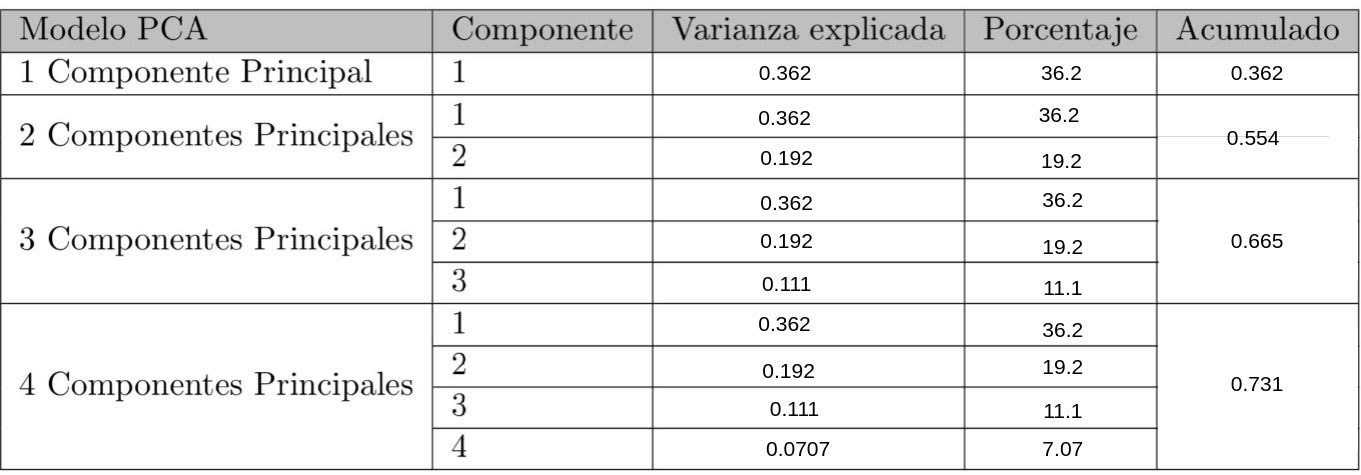

Ahora podemos identificar cuanta varianza en los datos es explicada por cada componente principal y cómo esa varianza se acumula a medida que consideramos más componentes. Esto nos permite tomar decisiones  sobre cuántos componentes principales incluir en nuestro análisis.

**B)**

Dividimos el conjunto de datos en dos, la parte de  entrenamiento(un 80%) y la parte de testeo (el 20% restante).

Para eso primero permutamos todas las filas (vinos) con la funcion de numpy para luego dividirlo y que los vinos esten mezclados.

In [ ]:
n = conjunto.shape[0]
mezcla = np.random.permutation(n)
hasta = int(n * 0.8)
train = mezcla[:hasta]
test = mezcla[hasta:]
entrenamientoI = conjunto[train, :-1]
entrenamientoD = dependientes[train]
testI = conjunto[test, :-1]
testD = dependientes[test]
ent = normalizar(entrenamientoI)[0]

**Graficamos en 1, 2 y 3 componentes principales**

In [ ]:
autovecsnorm = ((sigavalavec(covarianza(datos),13,200))[0])
s = normalizar(entrenamientoI)[1]
m = normalizar(entrenamientoI)[2]

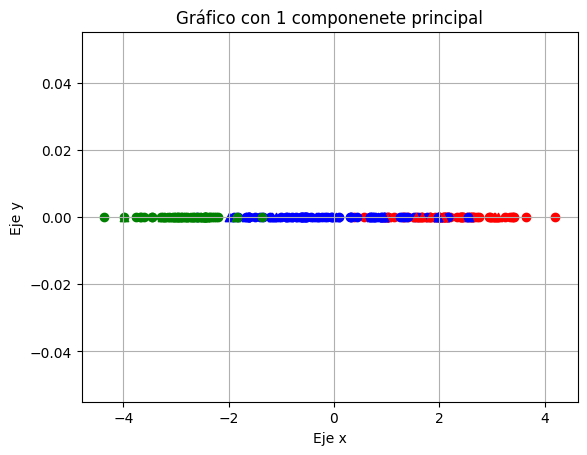

In [ ]:
def graficar(lables , coordenadas): #Para separar las coordenadas por labels
  list1 =[]
  list2=[]
  list3 =[]
  for i in range(len(lables)):
    if lables[i] ==1:
      list1.append(coordenadas[i])
    if lables[i] ==2:
      list2.append(coordenadas[i])
    if lables[i] ==3:
      list3.append(coordenadas[i])
  return np.array(list1) , np.array(list2) , np.array(list3)


lenE1 = len(graficar(entrenamientoD, categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,1,1)[1])[0])
lenE2 = len(graficar(entrenamientoD, categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,1,1)[1])[1])
lenE3 = len(graficar(entrenamientoD, categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,1,1)[1])[2])

plt.scatter(graficar(entrenamientoD, categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,1,1)[1])[0], np.zeros((lenE1)),color='r')
plt.scatter(graficar(entrenamientoD, categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,1,1)[1])[1], np.zeros((lenE2)),color='b')
plt.scatter(graficar(entrenamientoD, categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,1,1)[1])[2], np.zeros((lenE3)),color='g')

lenT1 = len(graficar(categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,1,1)[0],categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,1,1)[2])[0])
lenT2 = len(graficar(categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,1,1)[0],categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,1,1)[2])[1])
lenT3 = len(graficar(categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,1,1)[0],categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,1,1)[2])[2])

plt.scatter(graficar(categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,1,1)[0],categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,1,1)[2])[0], np.zeros((lenT1)),marker='^', color='r')
plt.scatter(graficar(categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,1,1)[0],categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,1,1)[2])[1], np.zeros((lenT2)),marker='^', color='b')
plt.scatter(graficar(categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,1,1)[0],categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,1,1)[2])[2], np.zeros((lenT3)),marker='^', color='g')

plt.title("Gráfico con 1 componenete principal")
plt.xlabel("Eje x")
plt.ylabel("Eje y")

plt.grid()

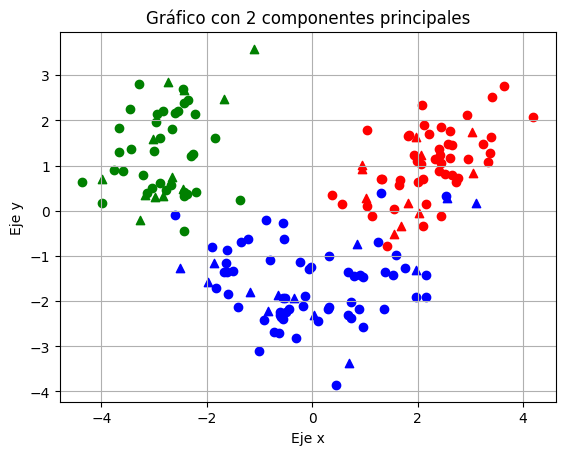

In [ ]:
plt.scatter(graficar(entrenamientoD, categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,2,1)[1])[0][:,0], graficar(entrenamientoD, categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,2,1)[1])[0][:,1],color='r')
plt.scatter(graficar(entrenamientoD, categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,2,1)[1])[1][:,0], graficar(entrenamientoD, categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,2,1)[1])[1][:,1],color='b')
plt.scatter(graficar(entrenamientoD, categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,2,1)[1])[2][:,0], graficar(entrenamientoD, categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,2,1)[1])[2][:,1],color='g')

plt.scatter(graficar(categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,2,1)[0],categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,2,1)[2])[0][:,0], graficar(categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,2,1)[0], categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,2,1)[2])[0][:,1],marker='^', color='r')
plt.scatter(graficar(categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,2,1)[0],categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,2,1)[2])[1][:,0], graficar(categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,2,1)[0], categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,2,1)[2])[1][:,1],marker='^', color='b')
plt.scatter(graficar(categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,2,1)[0],categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,2,1)[2])[2][:,0], graficar(categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,2,1)[0], categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,2,1)[2])[2][:,1],marker='^', color='g')

plt.title("Gráfico con 2 componentes principales")
plt.xlabel("Eje x")
plt.ylabel("Eje y")


plt.grid()

Comentario: En algunos casos podemos ver graficamente como un vino fue mal categorizado por estar cerca de un vino de la base de datos que no pertenece a la "familia" correspondiente.

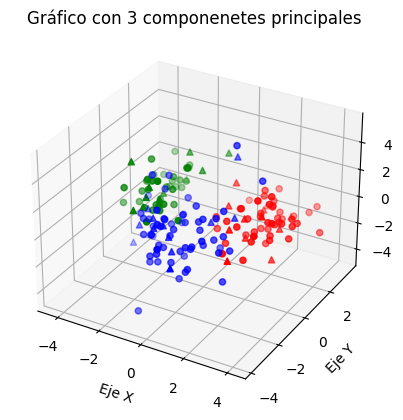

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(graficar(entrenamientoD, categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[1])[0][:,0], graficar(entrenamientoD, categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[1])[0][:,1], graficar(entrenamientoD, categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[1])[0][:,2], c='r', marker='o')
ax.scatter(graficar(entrenamientoD, categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[1])[1][:,0], graficar(entrenamientoD, categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[1])[1][:,1], graficar(entrenamientoD, categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[1])[1][:,2], c='b', marker='o')
ax.scatter(graficar(entrenamientoD, categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[1])[2][:,0], graficar(entrenamientoD, categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[1])[2][:,1], graficar(entrenamientoD, categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[1])[2][:,2], c='g', marker='o')

ax.scatter(graficar(categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[0],categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[2])[0][:,0], graficar(categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[0], categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[2])[0][:,1],graficar(categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[0], categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[2])[0][:,2],marker='^', color='r')
ax.scatter(graficar(categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[0],categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[2])[1][:,0], graficar(categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[0], categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[2])[1][:,1],graficar(categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[0], categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[2])[1][:,2],marker='^', color='b')
ax.scatter(graficar(categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[0],categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[2])[2][:,0], graficar(categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[0], categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[2])[2][:,1],graficar(categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[0], categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,3,1)[2])[2][:,2],marker='^', color='g')

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.set_title('Gráfico con 3 componenetes principales')

plt.show()

**¿Cual de los modelos sugiere utilizar para predecir el segmento al que pertenece un vino?**

Creemos que esto va a depender de la situacion ya que en el caso de tener muchos vinos, en vez de tener 178 nada mas, hacer el producto de esas matrices es mas costoso ya que ocupa mas espacio memoria.

En nuestro caso, la diferencia entre uno, dos y tres componentes no es tan grande por lo que  si se busca la mayor presicion posible, recomendamos usar la de tres componentes a pesar de que pueda llegar a tardar mas. Justo en nuestro experimento al no estar trabajando con una cantidad grande de vinos como podria pasar en un caso real, no hay una diferencia significante en los tiempos.

Si estamos hablando de un caso mas general en el que tenemos una base de datos con muchos mas datos que en el nuestro recomendariamos la de dos componentes, ya que es el mas eficaz en tiempo y resultado.


C) Matriz de confusion

In [ ]:
def matconfucion(prediccion , real):
  mat = np.zeros((4,4))
  for k in range(len(real)):
      mat[real[k]][prediccion[k]] =  mat[real[k]][prediccion[k]] + 1
  return mat[1:,1:]

**Ejemplo**

In [ ]:
prediccion = categorizar(testI,autovecsnorm,ent,s,m ,entrenamientoD,13,1)[0]
real =list(map(int,dependientes[test]))
print(matconfucion(prediccion,real))

[[10.  0.  0.]
 [ 1. 15.  1.]
 [ 0.  0.  9.]]


 **¿A que conclusiones se puede llegar?**

La matriz de confusión nos dice la cantidad de muestras clasificadas correctamente e incorrectamente para cada clase. Es una herramienta fundamental para analizar el rendimiento de un modelo de clasificación.

Analizando la matriz de confusion que nos dio a partir de un problema de clasificacion con tres clases (en nuestro caso 1 ,2 y 3), pudimos notar que la suma de la diagonal principal (la traza) representa los casos en los que el modelo acerto,es decir, que coincidieron los datos reales con los predecidos por nuestra implementacion. Mientras que la suma de los elementos fuera de la diagonal principal representa los casos en los que el modelo se equivoco, lo que indica que los datos reales no coincidieron con la predicicion.

Corrimos el experimento con distintos vinos de test y nos dimos cuenta que por lo general los aciertos son mayoria. Vimos que cuantos mas autovectores le pedimos, mas eficaz es. Lo cual tiene sentido, ya que al obtener una proyeccion mas detallada de cada vino, es mas precisa la distancia entre el vino a categorizar y los vinos de la base de entrenamiento.

Tambien entendimos que cuantos mas KNN le pedimos a la funcion "categorizar" mas efectivo va a ser. Esto ocurre porque en el caso de pedirle un vino, puede pasar que el mas cercano no sea el correcto, ya que es posible que al centrar y normalizar la base de datos algun vino no quede con su "familia" correspondiente. Y a la hora de pedirle mas KNN, buscara los vinos mas cercanos y de esta forma poder ver el label que mas se repite sin esas pequeñas confusiones.

En conclusion la funcion creada "categorizar" muestra un buen rendimiento a la hora de la clasificacion de vinos. Si bien no es exacta, notamos un gran desempeño de ella.

### **Conclusion Final**

En conclusion , lo que podemos decir es que nos parecio un trabajo interesante , divertido y desafiante .
Fue nuestro primer pantallazo a lo que va a ser nuestra carrera. Nunca habiamos trabajado con datos antes y nos parecio util y una muy buena introduccion para lo que viene.

Aprendimos la importancia del procesamiento de datos mediante normalización y centrado de ellos. Para luego calcular su matriz de covarianza lo que nos facilita utilizar el metodo de la potencia, que luego de muchas iteraciones nos permite encontrar autovectores y autovalores dominantes.

Ahora podriamos categorizar la cantidad de vinos que querramos a partir de nuestra funcion "categorizar" , si bien no es 100% exacta a la hora de la clasificacion de ellos podemos afirmar que cuantos mas knn  y  cantv le pidamos mas asertado va a ser el segmento resultante.

Consideramos muy util el uso de la matriz de confusion para evaluar el rendimiento de la funcion , la que nos dio informacion con la cual podemos afirmar que tiene un muy buen desempeño.

Nos parecio muy interesante poder ver graficamente como se agrupaban los vinos dependiendo de sus labels , y ahi pudimos observar los pequeños errores que tiene nuestra funcion.





